# Byte & Brew Coffee Shop Project

I'm excited to share with you the plans for an innovative new venture, our robot-operated café, <b>Byte and Brew</b>, in Los Angeles. 

As technology enthusiasts and coffee aficionados, my partners and I envision a unique blend of cutting-edge robotics and the timeless appeal of a cozy coffee shop. The concept of robot waiters serving artisanal coffee is not only intriguing but also promising in terms of operational efficiency and customer experience.

However, launching Byte and Brew is an ambitious and costly project. To ensure its success and longevity, we seek to attract investors by providing a thorough market analysis of the current restaurant landscape in Los Angeles. Our goal is to demonstrate that the novelty of robot waiters will captivate customers initially and that our café can sustain its success over time.

As a data analysis expert, I've been tasked with conducting a comprehensive market study using open-source data about restaurants in LA. This analysis will help us understand the proportions of different types of establishments, the prevalence of chain versus independent restaurants, and the characteristics that define successful chains. Additionally, we will examine the average number of seats in various types of restaurants, identify the most popular locations, and analyze seating trends on streets with multiple eateries.

The insights gained from this analysis will inform our strategic decisions regarding the type of establishment Byte and Brew should be and the optimal number of seats to ensure profitability and scalability. Our ultimate aim is to present a compelling case to investors, showcasing Byte and Brew as a viable and innovative business opportunity in the vibrant culinary scene of Los Angeles.

[**Click Here to Watch a Presentation**](https://www.canva.com/design/DAGL4r9FdTk/dnWkH1KXan-i3CHxZ8yf6g/view?utm_content=DAGL4r9FdTk&utm_campaign=designshare&utm_medium=link&utm_source=editor)

## Part 1; Restdf DataFrame

Let's start by bringing the libraries we will need:

In [1]:
# Python Standard Libraries
import datetime
import json
import os

# Third Party Libraries
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.stats.proportion import proportions_ztest

Next, we upload the dataset, which will be contained in a variable called <b>"restdf"</b>:

In [2]:
restdf = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/rest_data_us_upd.csv')

We'll perform some transformations:

In [3]:
restdf.columns = restdf.columns.str.strip()
restdf.columns = restdf.columns.str.lower()

Now, let's wee what we've got here:

In [4]:
print(restdf.info())
print('_'*50)
print(restdf.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None
__________________________________________________
      id          object_name                  address  chain object_type  \
0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN       2100 ECHO PARK AVE  False  Restaurant

## Part 2; Pre-Processing

The second part of this project involves performing some transformations and inspecting data. Let's see what we've got.

### Missing values

Inspecting missing values is a crucial step as it allows us to maintain the integrity of the information we rely on to understand the restaurant landscape in Los Angeles, ultimately enabling us to make well-informed decisions for Byte and Brew.

A former print of the dataframe information showed us the only column with missing values is the "chain" column. Let's see how many NaN values we have:

In [5]:
missing_values_count = restdf['chain'].isnull().sum()
print("Number of missing values in 'chain' column:", missing_values_count)


Number of missing values in 'chain' column: 3


We will delete the three missing values from the chain column to ensure the consistency and reliability of our analysis. These missing values represented a very small fraction of our dataset, and removing them allows us to maintain the integrity of the data without significantly impacting the overall results.

In [6]:
restdf = restdf.dropna(subset=['chain'])

# Verify that the rows have been removed
missing_values_count_after = restdf['chain'].isnull().sum()
print("Number of missing values in 'chain' column after removal:", missing_values_count_after)

Number of missing values in 'chain' column after removal: 0


### Duplicates

Now it's the turn to inspect duplicates

In [7]:
# Check for duplicates for each column using lambda function
duplicate_counts = restdf.apply(lambda x: x.duplicated().sum())
print(duplicate_counts)


id                0
object_name     979
address        1139
chain          9646
object_type    9642
number         9432
dtype: int64


Based on the nature of the data, here's my opinion on handling duplicates in each column:

* <b>ID:</b> Since there are no duplicates, we don't need to do anything here. No action needed.

* <b>object_name:</b> It's common for restaurant chains to have multiple branches with the same name. Therefore, duplicates in this column can be legitimate and shouldn't be removed. No action needed.

* <b>address</b> Duplicates here could be due to multiple restaurants sharing the same location, especially in large complexes or malls. However, we should verify that these duplicates are intentional. One approach is to check if these addresses have the same object_name or chain status. If they differ significantly, it might indicate an error.

* <b>chain:</b> Since this column contains boolean values and duplicates are expected, we don't need to do anything here. No action needed.

* <b>object_type:</b> This column stores categorical values, and duplicates are expected, so no action is needed.

* <b>number:</b> The number of seats can have duplicates, as multiple restaurants can have the same seating capacity. Thus, no action is needed here.

For our next steps, we can investigate the addresses that have duplicates to see if they are legitimate. We can do this by checking if the object_name and chain status match for duplicate addresses.

Here's the code to investigate duplicate addresses:

In [8]:
# Get duplicate addresses
duplicate_addresses = restdf[restdf.duplicated('address', keep=False)].sort_values('address')

# Display duplicate addresses along with object_name and chain status
duplicate_addresses[['address', 'object_name', 'chain']].head(20)

,address,object_name,chain
5624,100 N LA CIENEGA BLVD E-3,SOUPLANTATION # 17,True
1588,100 N LA CIENEGA BLVD E-3,SOUPLANTATION,True
6277,100 WORLD WAY,GORDEN BIERSCH,False
8201,100 WORLD WAY,HOME TURF SPORTS BAR,False
6515,100 WORLD WAY,STARBUCKS COFFEE,True
5989,100 WORLD WAY,LA BREA BAKERY,True
5996,100 WORLD WAY,TORN BASIL,False
6000,100 WORLD WAY,PINKBERRY #78,True
7509,1000 GAYLEY AVE,O'HARA'S,False
8946,1000 GAYLEY AVE,ROCCO'S TAVERN,True


Upon reviewing the sample of duplicate addresses, it appears that multiple establishments can indeed share the same address, such as in large complexes, airports, or multi-use buildings. This suggests that the duplicates in the address column are likely legitimate and reflect the actual distribution of restaurants in Los Angeles.

Given this information, there's no need to remove these duplicates as they represent valid entries. Duplicates are legitimate. No action needed.

### Extract Street Names

Extracting street names from the address column is essential for our analysis as it allows us to identify trends and patterns in restaurant locations across Los Angeles. 

By isolating street names, we can determine which streets have the highest concentration of restaurants, assess the competition, and identify prime locations for Byte and Brew. 

This detailed understanding of street-level dynamics is crucial for strategic decision-making and for attracting potential investors to our innovative café project.

In [9]:
# Let's create the street_name column and put there the streets from the addresses
restdf['street_name'] = restdf['address'].apply(lambda x: ' '.join(x.split()[1:]))
print(restdf[['address', 'street_name']].head())

                   address         street_name
0   3708 N EAGLE ROCK BLVD   N EAGLE ROCK BLVD
1        100 WORLD WAY 120       WORLD WAY 120
2  6801 HOLLYWOOD BLVD 253  HOLLYWOOD BLVD 253
3       1814 W SUNSET BLVD       W SUNSET BLVD
4       2100 ECHO PARK AVE       ECHO PARK AVE


### Outliers

Alright, let's hande outliers; particularly, we will examine extremely high or low numbers of seats that may skew analysis, using statistical methods like the Interquartile Range (IQR). 

Here's the step-by-step process:

* **Calculate the IQR:** The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile).
  
* **Determine the Outlier Boundaries:** We define outliers as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

* **Identify Outliers:** We will use the calculated boundaries to find outliers in the number column.

* **Handle Outliers:** Depending on the context, we can either remove outliers, cap them at the boundary values or simply leaving them as they are.

In [10]:
# Calculation of Q1 (25th percentile) and Q3 (75th percentile)
Q1 = restdf['number'].quantile(0.25)
Q3 = restdf['number'].quantile(0.75)

# IQR
IQR = Q3 - Q1

# Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers detected
outliers = restdf[(restdf['number'] < lower_bound) | (restdf['number'] > upper_bound)]

# Print the number of outliers and a sample
print(f"Number of outliers in 'number' column: {len(outliers)}")
print('')
print(outliers[['object_name', 'number']].head(10))

print('_'*50)

# Let's review the minimum and maximum values
print(restdf['number'].describe())

Number of outliers in 'number' column: 1415

                       object_name  number
6                              CPK     100
12        EMC RESTAURANT GROUP LLC     133
16                      HMS BOUNTY     147
18                        MURAKAMI     139
19               DELTA SKY CLUB T3     103
31                DUNES RESTAURANT     118
32           THE FOUNDATION CENTER     182
41                            IHOP     158
60  RENAISSANCE 96TH STREET BISTRO     184
71                MCDONALD'S #2084     112
__________________________________________________
count    9648.000000
mean       43.703566
std        47.627252
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64


The calculation shows there are 1,415 registries of establishments with a high number of seats. Let's see these outliers through the lens of a scatterplot:

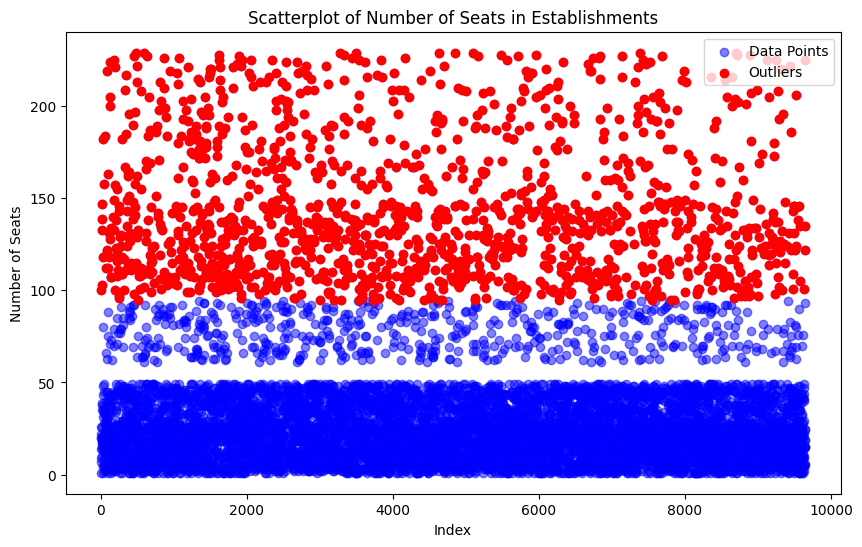

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(restdf.index, restdf['number'], alpha=0.5, color='blue', label='Data Points')
plt.scatter(outliers.index, outliers['number'], color='red', label='Outliers')
plt.title('Scatterplot of Number of Seats in Establishments')
plt.xlabel('Index')
plt.ylabel('Number of Seats')
plt.legend()
plt.show()

My opinion is that **I don't think these are outliers**, since some coffee shops may contain that large number of seats. 

In the context of restaurants and coffee shops, it's reasonable to expect a wide range of seating capacities, especially in diverse environments like Los Angeles, where some establishments could be large venues or located in places like airports, complex centers or malls.

Given this context, it may not be necessary to treat these values as outliers. Instead, we can accept that there will naturally be a variety in the number of seats across different types of establishments. Therefore, we can proceed without modifying these values, acknowledging that the variability in seating capacity is part of the dataset's reality.

However, there's something else we can do; we can **categorize these establishments by its size.**

### Size Categorization

To better understand and analyze the variety of restaurant sizes in Los Angeles, we have categorized the seating capacities into four distinct size categories: Tiny, Small, Medium, Large and Very Large. 

This categorization allows us to capture the full spectrum of dining establishments, from intimate cafes to expansive eateries.

* **Tiny (0-20 seats):** This category includes cozy cafes and small diners where customers can enjoy a more intimate and personal dining experience. Establishments in this range often prioritize quick service and a close-knit atmosphere. They are ideal for niche markets, offering unique and specialized food and beverage options in a comfortable and relaxed setting.

* **Small (21-50 seats):** Restaurants with this seating capacity still maintain a personal touch but can accommodate more customers, offering a balance between intimacy and moderate foot traffic. This size is typical for many neighborhood restaurants and specialty coffee shops. These establishments often serve as community hubs, where regular customers enjoy a familiar and welcoming environment.

* **Medium (51-100 seats):** These establishments are well-suited for handling larger groups while still providing a comfortable dining environment. Medium-sized restaurants often feature a diverse menu and cater to both casual diners and small events. They strike a balance between capacity and service, making them versatile venues for family gatherings, business lunches, and social meet-ups.

* **Large (101-150 seats):** Large restaurants are capable of serving a high volume of customers and are ideal for popular dining destinations, events, and gatherings. This category includes well-known chains, large family restaurants, and venues within shopping centers or airports. These establishments can handle significant customer turnover, making them suitable for high-demand locations and peak dining times.

* **Very Large (more than 150 seats):** Very large establishments are designed to accommodate a significant number of guests, making them ideal for large-scale events, banquets, and highly popular dining spots. This category includes expansive restaurants, event spaces, and major chain locations that require substantial seating to meet demand. These venues often feature multiple dining areas, including private rooms and outdoor seating, to cater to a wide range of customer needs and preferences.

In [12]:
# Let's create a function to define the size categories
def categorize_size(number):
    if number <= 20:
        return 'Tiny'
    elif number <= 50:
        return 'Small'
    elif number <= 100:
        return 'Medium'
    elif number <= 150:
        return 'Large'
    else:
        return 'Very Large'

# Now, we apply that function to create a new column 'size'
restdf['size'] = restdf['number'].apply(categorize_size)

# Let's verify the new categorization
print(restdf[['number', 'size']].sample(10))

      number    size
5339       9    Tiny
9559       1    Tiny
9437      47   Small
5         14    Tiny
5668      35   Small
1553      69  Medium
7630       5    Tiny
624       49   Small
9551      23   Small
4328      20    Tiny


This categorization helps us understand the distribution of restaurant sizes, identify trends, and tailor our strategy for **Byte and Brew** to fit into the existing market landscape effectively. By analyzing each category, we can better anticipate customer needs and preferences, ensuring our robot-operated café can attract and accommodate a diverse clientele.

### Establishment Type

To gain a clearer understanding of the restaurant landscape in Los Angeles, we have introduced a new categorization that distinguishes between chain establishments and independent ones. 

* **Chain establishments** are part of a larger network of restaurants that share a common brand, menu, and operational standards. These restaurants benefit from brand recognition, standardized processes, and often, economies of scale.

* On the other hand, **independent establishments** operate as standalone entities without the backing of a larger corporate structure. These establishments often showcase unique culinary styles, personalized service, and a strong connection to the local community. 

Creating a categorical column that separates chain establishments from independent ones allows us to analyze trends, market share, and customer preferences for each type. This analysis is crucial for understanding the competitive landscape and determining how "Byte and Brew" can position itself effectively.

In [13]:
# Let's create a function which categorizes establishments as Chain or Independent
def categorize_establishment(chain):
    return 'Chain' if chain else 'Independent'

# Apply the function to create a new column 'ownership'
restdf['ownership'] = restdf['chain'].apply(categorize_establishment)

# Verify the new feature
print(restdf[['chain', 'ownership']].sample(10))


      chain    ownership
5276   True        Chain
8095  False  Independent
671    True        Chain
3116  False  Independent
8463  False  Independent
444    True        Chain
8296  False  Independent
3673   True        Chain
5384  False  Independent
4515   True        Chain


Whether we decide to expand as a chain or focus on maintaining a unique, independent identity, this categorization provides valuable insights to guide our business strategy and ensure long-term success.

### Miscellaneous

Performing these final transformations is essential to ensure our dataset is clear, consistent, and ready for thorough analysis. 

Let's rename columns in order to enhance the clarity and readability of our data, making it easier to understand and work with.

In [14]:
restdf.rename(columns={'object_name': 'name', 'object_type': 'establishment_type', 'number': 'seats'}, inplace=True)

Let's convert data types in order to reduce memory usage and improve processing efficiency. 

In [15]:
restdf['chain'] = restdf['chain'].astype('boolean')
restdf['size'] = restdf['size'].astype('category')
restdf['ownership'] = restdf['ownership'].astype('category')
restdf['seats'] = restdf['seats'].astype('int64')

We standarize text data in the 'name,' 'address,' and 'street_name' columns by capitalizing and stripping extra spaces ensures uniformity, preventing discrepancies that could arise from inconsistent text entries.

In [16]:
restdf['name'] = restdf['name'].str.title().str.strip()
restdf['address'] = restdf['address'].str.title().str.strip()
restdf['street_name'] = restdf['street_name'].str.title().str.strip()

And finally, we will reorder the columns to a logical sequence that surely, will enhance the dataset's usability.

In [17]:
restdf = restdf[['id', 'name', 'establishment_type', 'seats', 'size', 'ownership', 'address', 'street_name', 'chain']]

### Working Model

Here's how our final model looks like:

In [18]:
print(restdf.info())
restdf

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 9650
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  9648 non-null   int64   
 1   name                9648 non-null   object  
 2   establishment_type  9648 non-null   object  
 3   seats               9648 non-null   int64   
 4   size                9648 non-null   category
 5   ownership           9648 non-null   category
 6   address             9648 non-null   object  
 7   street_name         9648 non-null   object  
 8   chain               9648 non-null   boolean 
dtypes: boolean(1), category(2), int64(2), object(4)
memory usage: 565.6+ KB
None


,id,name,establishment_type,seats,size,ownership,address,street_name,chain
0,11786,Habitat Coffee Shop,Cafe,26,Small,Independent,3708 N Eagle Rock Blvd,N Eagle Rock Blvd,False
1,11787,Reilly'S,Restaurant,9,Tiny,Independent,100 World Way 120,World Way 120,False
2,11788,Street Churros,Fast Food,20,Tiny,Independent,6801 Hollywood Blvd 253,Hollywood Blvd 253,False
3,11789,Triniti Echo Park,Restaurant,22,Small,Independent,1814 W Sunset Blvd,W Sunset Blvd,False
4,11790,Pollen,Restaurant,20,Tiny,Independent,2100 Echo Park Ave,Echo Park Ave,False
...,...,...,...,...,...,...,...,...,...
9646,21432,Hall Of Justice,Restaurant,122,Large,Independent,217 W Temple Ave,W Temple Ave,False
9647,21433,Fin-Melrose,Restaurant,93,Medium,Independent,5750 Melrose Ave,Melrose Ave,False
9648,21434,Juicy Wingz,Fast Food,15,Tiny,Chain,6741 Hollywood Blvd,Hollywood Blvd,True
9649,21435,Medidate Coffee,Cafe,6,Tiny,Independent,548 S Spring St Ste 100,S Spring St Ste 100,False


## Exploratory Data Analysis

This analysis helps restaurant owners, investors, and urban planners make informed decisions about market opportunities, resource allocation, and strategies for new ventures, ultimately contributing to a more vibrant and responsive dining sector.

### Distribution of Number of Seats

Understanding the distribution of the number of seats in restaurants is crucial for gaining insights into the restaurant industry's landscape. By analyzing this data, we can identify prevalent trends, such as the predominance of smaller establishments, which cater to a more intimate dining experience.

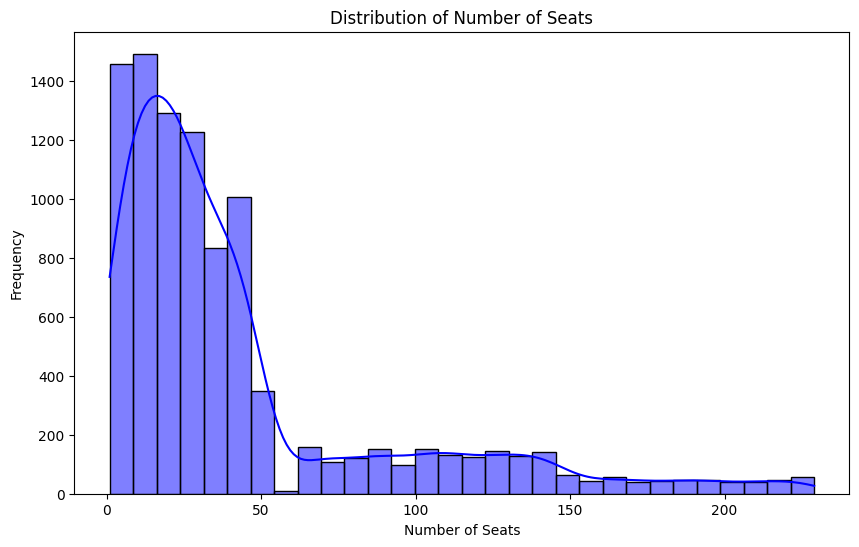

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(restdf['seats'], bins=30, color="blue", kde=True)
plt.title('Distribution of Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.show()


The histogram shows that the majority of restaurants have a seating capacity of 0 to 50 seats, indicating that smaller, more intimate dining establishments dominate the market. This trend likely reflects the appeal of lower overhead costs and the ability to offer a personalized dining experience. 

In contrast, medium-sized restaurants (51 to 100 seats) and larger venues (over 100 seats) are significantly less common. This suggests that while there are some establishments catering to larger groups and events, they are relatively rare compared to the smaller eateries that make up the bulk of the industry. 

This distribution highlights the importance of smaller venues in the restaurant market.

### Proportion of Establishment Types

Let's insoect the proportions of different establishment types, so we can understand market dynamics and consumer preferences.

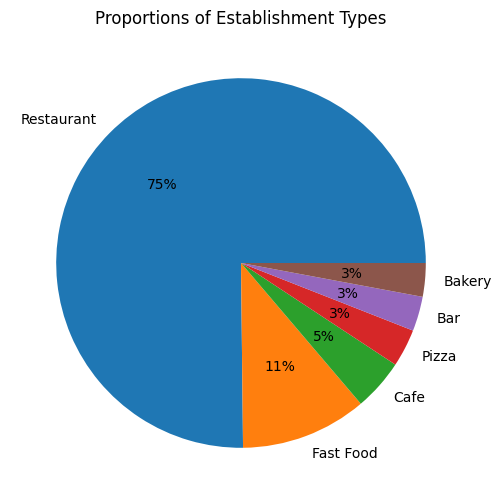

In [32]:
plt.figure(figsize=(10, 6))
restdf['establishment_type'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Proportions of Establishment Types')
plt.ylabel('')
plt.show()


This pie chart illustrates that the overwhelming majority, 75%, are classified as restaurants, indicating a strong preference or demand for traditional dining experiences. Fast food establishments account for 11%, reflecting a significant presence but much smaller compared to full-service restaurants. 

Cafes, the type of establishment which interests us, represent 5% of the total, while bakeries, bars, and pizza places each constitute about 3%, suggesting niche markets for these types.

We can't make conclusions yet, but it's a good start.

### Proportions of Ownership Types

Before we delve into our analysis of ownership types, we must define **what type of establishment is usually a chain.**

Based on our analysis of the restaurant landscape in Los Angeles, it is evident that certain types of establishments are more likely to be part of a chain. Notably, fast-food restaurants, casual dining spots, and coffee shops frequently operate as chain establishments. These types of restaurants benefit significantly from the brand recognition, standardized processes, and economies of scale that come with being part of a larger network.

Chains are able to leverage their established reputation and consistent quality to attract a broad customer base, which is particularly advantageous in the competitive food and beverage industry. This trend underscores the importance of considering the type of establishment when evaluating the potential success and scalability of "Byte and Brew" as a robot-operated café in Los Angeles. By understanding which types of establishments thrive as chains, we can better position our café for long-term success and appeal to both investors and customers.

Through our analysis of the restaurant landscape in Los Angeles, we have identified a clear characteristic that distinguishes chain establishments: **they tend to consist of many locations, each with a relatively small number of seats.** This approach allows chains to maximize their presence and accessibility across the city, catering to a large and diverse customer base by being conveniently located in various neighborhoods and high-traffic areas.

Chains prioritize quick service and turnover, which aligns with having smaller seating capacities. This setup enables them to serve more customers efficiently throughout the day, enhancing profitability while maintaining the quality and consistency that customers expect from a chain. Understanding this characteristic of chain establishments helps us strategically plan the expansion and operational model for "Byte and Brew," ensuring we align with successful industry practices to attract investors and customers alike.

Understanding the proportions of ownership types will provide insights into the prevalence of independent versus chain establishments, helping stakeholders make informed decisions regarding market positioning, competitive strategies, and investment opportunities. Let's see what we've got.

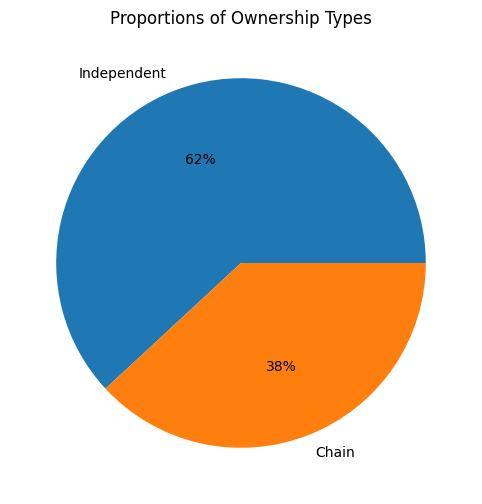

In [21]:
plt.figure(figsize=(10, 6))
restdf['ownership'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Proportions of Ownership Types')
plt.ylabel('')
plt.show()


62% being independent and 38% being part of a chain indicates that the majority of establishments are independently owned, which may suggest a preference for unique, locally-owned dining experiences. 

However, the significant presence of chain establishments, accounting for more than one-third of the total, highlights their substantial market share and the popularity of recognizable, standardized dining options. 

This balance between independent and chain establishments reflects a diverse dining landscape catering to varied consumer preferences.

### Restaurant Types by Category Size

Let's take a look at how these restaurant types, categorized by their ownership model (chain vs. independent), are distributed across different category sizes.

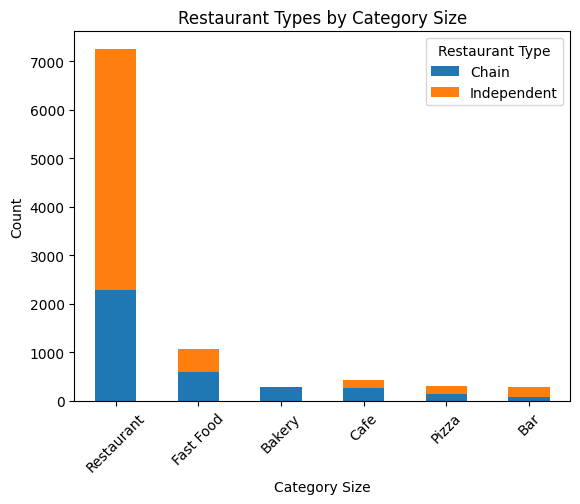

In [37]:
pivot_df = restdf.pivot_table(index='establishment_type', columns='ownership', aggfunc='size', fill_value=0, observed=False)
pivot_df = pivot_df.sort_values(by='Chain', ascending=False)

pivot_df.plot(kind='bar', stacked=True)
plt.title('Restaurant Types by Category Size')
plt.xlabel('Category Size')
plt.ylabel('Count')
plt.legend(title='Restaurant Type')
plt.xticks(rotation=45)
plt.show()

The analysis reveals significant disparities in the distribution of restaurant types across different categories. 

* Notably, the 'Restaurant' category, which encompasses traditional sit-down establishments, dominates the market with a substantial presence of both chain and independent ownership models. 
* Independent restaurants outnumber chains significantly, indicating a fragmented market with numerous small players. 
* In contrast, 'Fast Food' and 'Cafe' establishments show a more balanced distribution between chains and independents, suggesting a competitive landscape with both types of ownership models thriving. 
* The relatively lower counts in the 'Bakery', 'Bar', and 'Pizza' categories indicate niche markets, with opportunities for chains to expand their presence.

### Total Number of Seats by Establishment Type

By examining the number of seat by establishment type, we can better comprehend how various types of establishments contribute to the overall dining landscape and how they cater to different segments of the market.

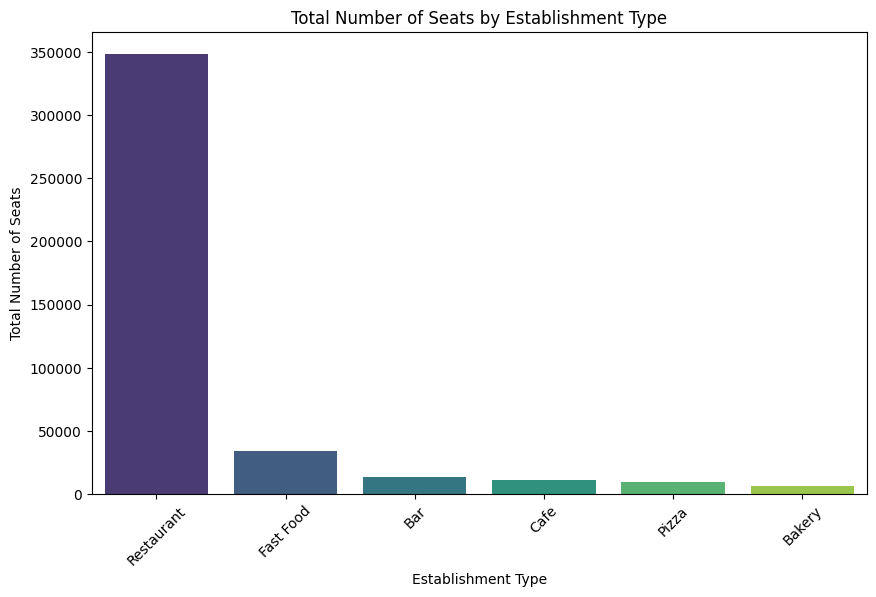

In [23]:
total_seats_by_establishment_type = restdf.groupby('establishment_type')['seats'].sum().reset_index()
total_seats_by_establishment_type = total_seats_by_establishment_type.sort_values(by='seats', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=total_seats_by_establishment_type, x='establishment_type', y='seats', hue='establishment_type', dodge=False, palette="viridis", legend=False)
plt.title('Total Number of Seats by Establishment Type')
plt.xlabel('Establishment Type')
plt.ylabel('Total Number of Seats')
plt.xticks(rotation=45)
plt.show()


Restaurants overwhelmingly dominate the total number of seats among establishment types, with over 350,000 seats. This indicates that restaurants are designed to accommodate a large number of customers, making them the primary dining option for many. 

In contrast, fast food outlets, bars, cafes, pizza places, and bakeries collectively account for a significantly smaller proportion of total seats. This distribution suggests that while these other types of establishments are present, they tend to be smaller in scale compared to traditional restaurants, likely catering to more niche markets or offering more specialized dining experiences.

Would it be revealing if we analyze this with averages? Let's find out.

### Average Number of Seats by Establishment Type

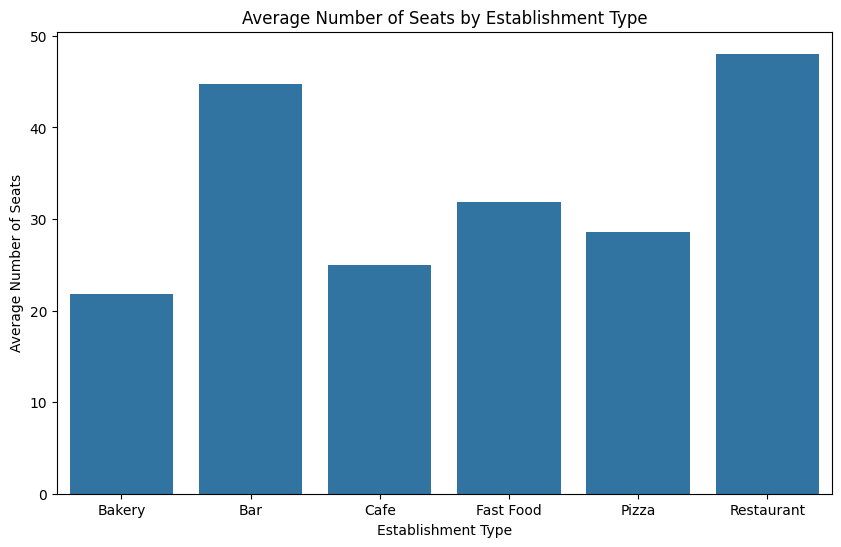

In [24]:
avg_seats_by_establishment_type = restdf.groupby('establishment_type')['seats'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_seats_by_establishment_type, x='establishment_type', y='seats', errorbar=None)
plt.title('Average Number of Seats by Establishment Type')
plt.xlabel('Establishment Type')
plt.ylabel('Average Number of Seats')
plt.show()

Now the story is different. Restaurants and bars lead with the highest average number of seats, around 50 each, indicating their capacity to serve larger groups of customers. Fast food outlets and pizza places have a moderate average number of seats, reflecting their design to accommodate a steady flow of customers but not large groups. 

Cafes and bakeries have the smallest average number of seats, which aligns with their typically smaller, more intimate settings. 

This distribution highlights the varying scales and customer service strategies of different types of dining establishments.

### Top 10 Streets by Number of Restaurants

Understanding the distribution of restaurants across various streets helps identify key areas of commercial activity and dining popularity. By analyzing these hotspots, we can gain insights into consumer behavior and business opportunities.

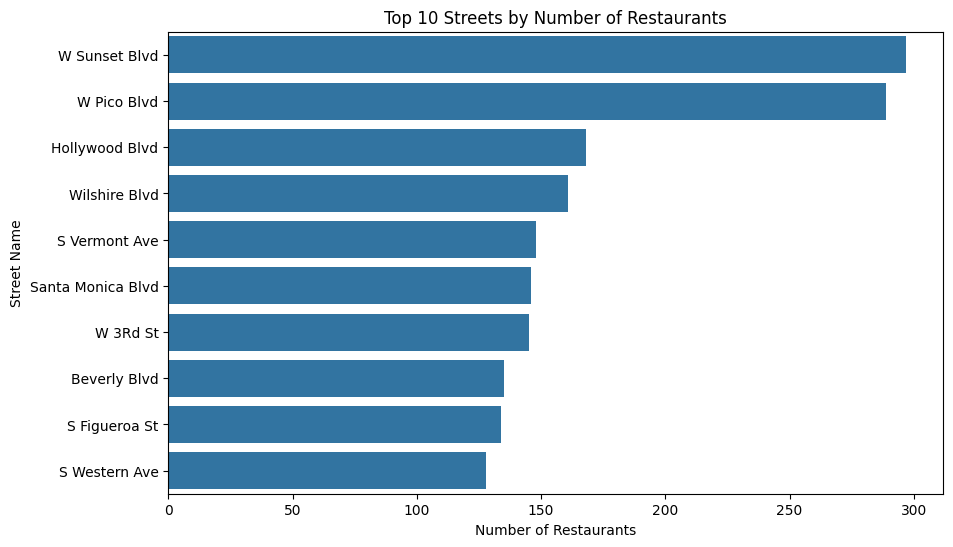

In [25]:
plt.figure(figsize=(10, 6))
top_10_streets = restdf['street_name'].value_counts().head(10)
sns.barplot(x=top_10_streets.values, y=top_10_streets.index)
plt.title('Top 10 Streets by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Street Name')
plt.show()


Now that we've got the top ten streets with more restaurants, we proceed to analyze the distribution of seating capacities inside these blocks, which will provide insights into the types of establishments that thrive in these areas.

### Distribution of Number of Seats for Restaurants on Top 10 Streets

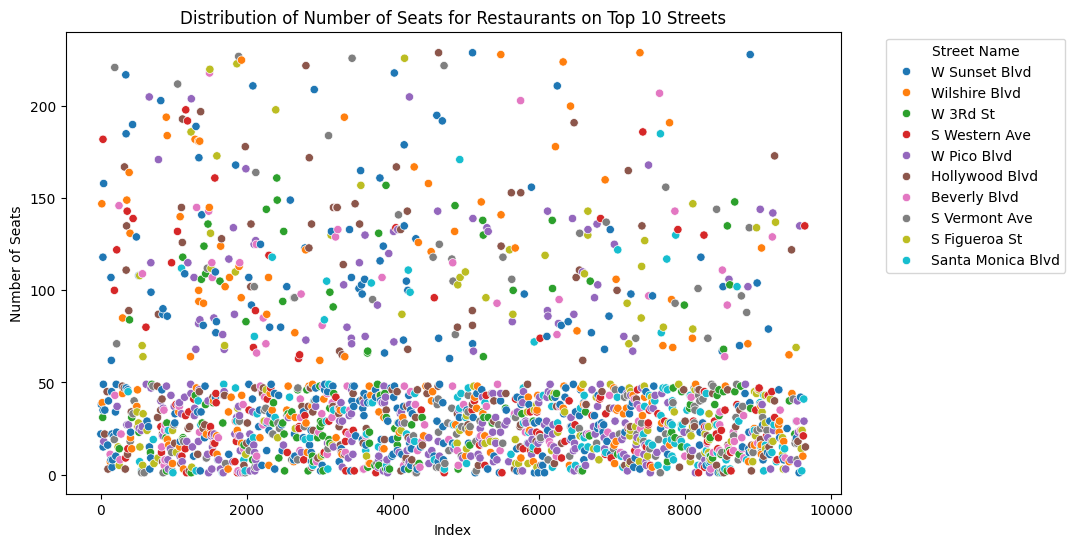

In [26]:
top_10_streets = restdf['street_name'].value_counts().head(10).index

# Here we filter the dataframe to include only the restaurants on the top 10 streets
top_10_streets_df = restdf[restdf['street_name'].isin(top_10_streets)]

# Let's make a scatterplot with the number of seats for restaurants on the top 10 streets ONLY
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_10_streets_df, x=top_10_streets_df.index, y='seats', hue='street_name')
plt.title('Distribution of Number of Seats for Restaurants on Top 10 Streets')
plt.xlabel('Index')
plt.ylabel('Number of Seats')
plt.legend(title='Street Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Alright, there is a clear clustering of restaurants with fewer seats, typically below 50, suggesting that smaller establishments are more common. However, there are significant numbers of restaurants with larger seating capacities, up to over 200 seats, indicating a diverse range of restaurant sizes catering to different market segments.

If we this distribution of seating capacities in restaurants on the busiest streets through a histogram, we will find a similar picture.

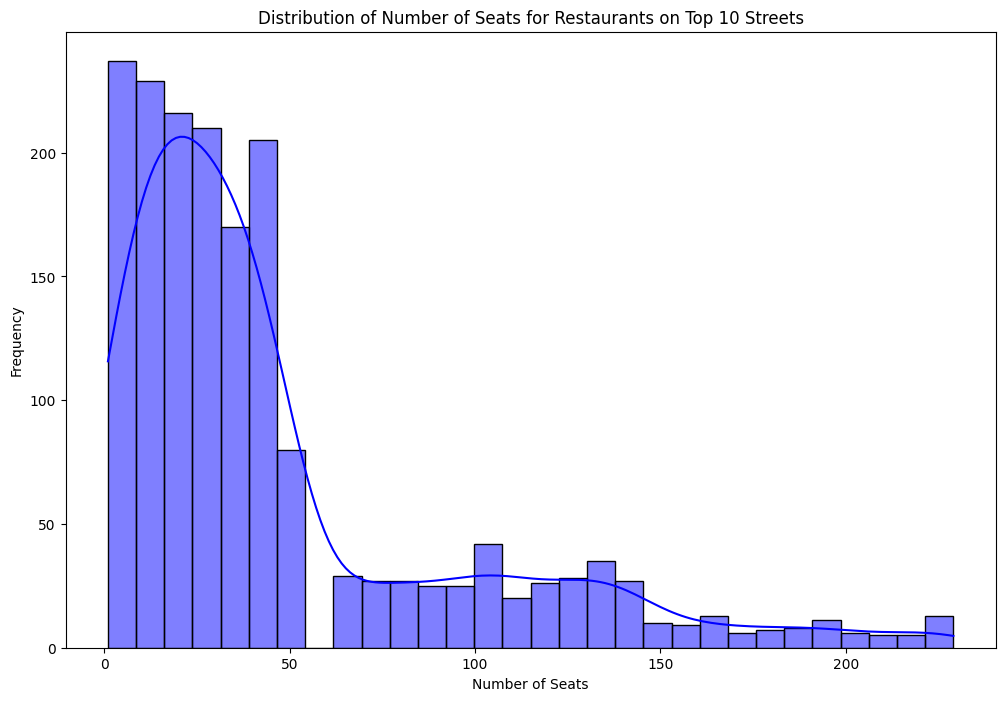

In [27]:
# The same, but now a histogram
plt.figure(figsize=(12, 8))
sns.histplot(data=top_10_streets_df, x='seats', bins=30, color='blue', kde=True)
plt.title('Distribution of Number of Seats for Restaurants on Top 10 Streets')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.show()


This suggests a predominance of more intimate dining experiences in these popular areas. The presence of restaurants with larger seating capacities, though less frequent, indicates that there are also options available for larger groups and events, catering to diverse customer needs.

Here's our key observations from this analysis of establishments on the top 10 streets by the number of restaurants 

* Firstly, there is a high concentration of restaurants on W Sunset Blvd and W Pico Blvd, indicating these streets as major culinary hubs. This trend suggests that these areas have high foot traffic and are popular destinations for dining out.

* Additionally, the distribution of the number of seats for restaurants on these streets shows a predominance of smaller establishments, with most having fewer than 50 seats. This implies that the dining experience in these areas is geared towards more intimate and possibly higher turnover dining options, catering to individuals or small groups rather than large gatherings.

* Furthermore, the diverse range of establishment types—such as restaurants, fast food outlets, cafes, and bars—highlights a vibrant and varied dining scene. The presence of various establishment types suggests that these streets cater to a wide array of preferences and dining needs, from quick bites to sit-down meals and social drinking spots.

Overall, the trends indicate that the top 10 streets are bustling with dining activities, offering a mix of establishment sizes and types that attract a broad demographic of customers. These areas are likely central to the local dining economy, providing numerous options for both residents and visitors.

### Restaurants with One Seat

Analyzing streets with only one restaurant provides valuable insights into market saturation and opportunities for expansion. With 2,440 streets hosting only one restaurant each, it highlights areas with potential for growth where competition is minimal.

In [28]:
# We start by calculating the number of restaurants on each street
street_counts = restdf['street_name'].value_counts()

# Then we find streets with only one restaurant
streets_with_one_restaurant = street_counts[street_counts == 1]

# Conversion to dataframe
streets_with_one_restaurant_df = streets_with_one_restaurant.reset_index()
streets_with_one_restaurant_df.columns = ['street_name', 'restaurant_count']

# Let's get the number of streets with only one restaurant
num_streets_with_one_restaurant = len(streets_with_one_restaurant)
# Let's get the list of streets with only one restaurant
list_streets_with_one_restaurant = streets_with_one_restaurant.index.tolist()

print(f"Number of streets with only one restaurant: {num_streets_with_one_restaurant}")
print('')
print(streets_with_one_restaurant_df.head(10))  # Displaying the first 10 rows for review

Number of streets with only one restaurant: 2440

               street_name  restaurant_count
0  Century Park E Ste #330                 1
1               Mcgarry St                 1
2       S Olive St Ste 101                 1
3        W Pico Blvd C1303                 1
4                Maple Ave                 1
5            N Vine St 103                 1
6      N Western Ave Ste 6                 1
7  S Normandie Ave Ste #1B                 1
8        W 9Th St Ste #107                 1
9          W Cahuenga Blvd                 1


This data can guide restaurant owners and investors in identifying underserved locations that could benefit from new dining options, thereby capturing untapped market demand. Moreover, understanding the distribution of solitary restaurants can help in urban planning and infrastructure development, ensuring these areas are supported adequately as they attract more businesses.

### Proportion of Restaurants per Size Category

Analyzing the distribution of restaurant sizes is crucial to understanding the market dynamics and customer preferences. By examining the proportions of different sizes, we can identify trends and potential opportunities for restaurant owners and investors. This analysis helps in making informed decisions regarding location, target market, and business strategies, ultimately contributing to the success and sustainability of new and existing establishments.

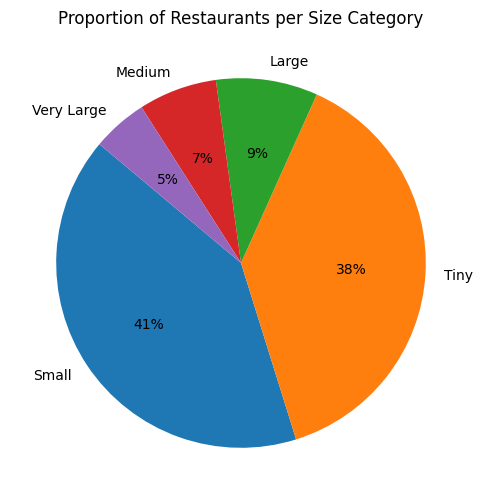

In [34]:
plt.figure(figsize=(10, 6))
restdf['size'].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=140)
plt.title('Proportion of Restaurants per Size Category')
plt.ylabel('')
plt.show()


The pie chart illustrates the proportions of restaurants categorized by size. The data shows that small and tiny restaurants dominate the landscape, accounting for 41% and 38% respectively. Medium, large, and very large establishments represent smaller proportions, with medium-sized restaurants making up 7%, large restaurants 9%, and very large restaurants only 5%. This distribution highlights the prevalence of smaller dining establishments, which may suggest a market trend favoring more intimate and compact dining experiences. The relatively lower percentages of larger restaurants could indicate higher operational costs or a lesser demand for large dining spaces.

### Distribution of Establishment Types by Size

Understanding the distribution of establishment sizes within each category is essential for several reasons. This analysis can help stakeholders identify market trends and customer preferences, allowing them to tailor their business strategies accordingly. For example, knowing that smaller establishments are more prevalent can guide decisions regarding space utilization, investment in property, and service offerings. Additionally, this information is valuable for city planners and commercial real estate developers to understand the landscape and plan for infrastructure that supports these business types effectively.

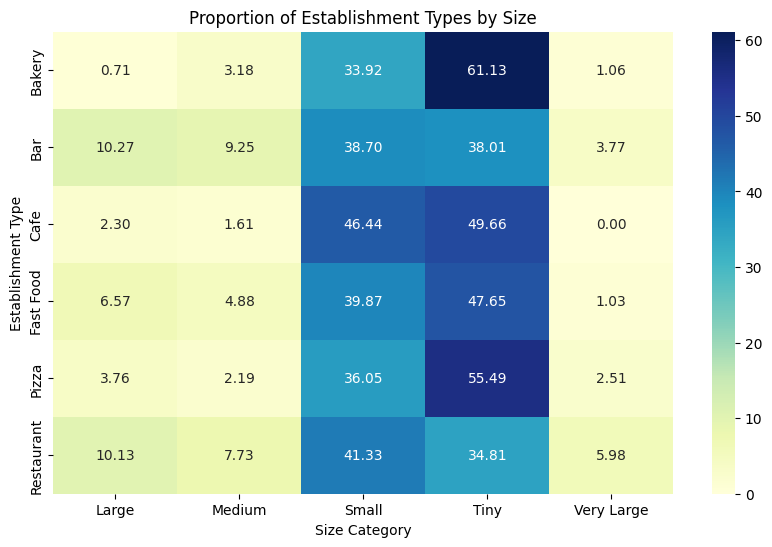

In [30]:
plt.figure(figsize=(10, 6))
establishment_size = pd.crosstab(restdf['establishment_type'], restdf['size'], normalize='index') * 100
sns.heatmap(establishment_size, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Proportion of Establishment Types by Size')
plt.xlabel('Size Category')
plt.ylabel('Establishment Type')
plt.show()

The heatmap provides a detailed view of the proportion of establishment types by size category. It reveals that tiny and small-sized establishments are predominant across most categories, particularly in bakeries and pizza places, where over half of the establishments are tiny. Restaurants have a more even distribution but still lean towards smaller sizes. Bars, on the other hand, have a more significant proportion of medium to large sizes compared to other establishment types. This pattern suggests that the nature of the establishment influences its typical size, with more informal and quick-service types favoring smaller sizes and establishments like bars and restaurants having a more balanced size distribution.



## Conclusion and Recommendations for Byte and Brew

Based on our comprehensive market analysis of the restaurant landscape in Los Angeles, several key insights and trends have emerged that will inform the strategic direction for Byte and Brew, our robot-operated café.

* **Market Landscape and Establishment Types:**
The majority of establishments in Los Angeles are restaurants, accounting for 75% of the market. Fast food outlets, cafes, bakeries, bars, and pizza places make up the remaining 25%, with cafes constituting 5% of the total. This distribution highlights a strong preference for traditional dining experiences but also indicates niche markets for other establishment types.

* **Ownership and Chain Characteristics:**
Our analysis shows that 62% of establishments are independently owned, while 38% belong to chains. Chains tend to be fast-food restaurants, casual dining spots, and coffee shops, which benefit from brand recognition, standardized processes, and economies of scale. Chains generally operate many locations with a relatively small number of seats to maximize presence and accessibility.

* **Seating Capacity Insights:**
The distribution of seating capacities reveals that most establishments have between 0 to 50 seats, indicating a predominance of smaller, more intimate dining experiences. Medium and large-sized venues are less common, suggesting that smaller establishments dominate the market due to lower overhead costs and the ability to offer personalized dining experiences.

* **Key Locations:**
Analysis of the top 10 streets by the number of restaurants indicates that W Sunset Blvd and W Pico Blvd are major culinary hubs. These areas are characterized by high foot traffic and a diverse range of establishment types, catering to varied customer preferences. Smaller establishments with fewer than 50 seats are more common in these high-traffic areas, suggesting a focus on intimate, higher turnover dining options.

* **Streets with Single Establishments:**
There are 2,440 streets in Los Angeles with only one restaurant. This insight is crucial for identifying less competitive areas that may offer potential opportunities for establishing new dining ventures.

Here's my Recommendations

**I.- Type of Restaurant:** Given the market trends and consumer preferences, Byte and Brew should be positioned as a unique, intimate café that leverages the novelty of robot waiters to attract customers. The focus should be on providing a personalized and efficient dining experience, which aligns with the prevalent trend of smaller establishments.

**II.- Number of Seats:** Based on the analysis, we recommend that Byte and Brew should have between 20 to 50 seats. This size is typical for many neighborhood restaurants and specialty coffee shops, allowing for a balance between intimacy and moderate foot traffic. It will also enable us to maintain a close-knit atmosphere while serving a reasonable number of customers.

**III.- Development of a Chain:** Considering the success of chain establishments in the fast-food and casual dining sectors, there is a strong potential for developing Byte and Brew into a chain. The key characteristics of successful chains—brand recognition, consistent quality, and efficient service—can be leveraged to expand Byte and Brew across multiple locations. Starting with a few pilot locations in high-traffic areas like W Sunset Blvd and W Pico Blvd can help establish the brand and build a loyal customer base before scaling up.

By strategically positioning Byte and Brew in line with market trends and consumer preferences, we can attract investors and ensure the long-term success and scalability of our robot-operated café in the vibrant culinary scene of Los Angeles.

This comprehensive approach will ensure that Byte and Brew stands out in the competitive market, appealing to both customers and investors with its innovative concept and efficient operations.

Thanks for reading me!

Ricardo Siller Cardenas